In [1]:
!pip install opencv-python-headless numpy


In [3]:
!pip install opencv-python-headless numpy matplotlib


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLO model
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

# Load COCO class labels
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# Get output layers of the YOLO model
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

def detect_objects(image_path):
    # Load and prepare the image
    image = cv2.imread(image_path)
    height, width, channels = image.shape

    # Prepare the image for YOLO
    blob = cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Perform forward pass and get detection results
    outputs = net.forward(output_layers)

    # Post-processing to filter out weak detections
    class_ids = []
    confidences = []
    boxes = []

    for output in outputs:
        for detection in output:
            scores = detection[5:]  # confidence scores for all classes
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:  # filter detections with confidence > 0.5
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply Non-Maximum Suppression to reduce overlapping boxes
    indices = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.5, nms_threshold=0.4)

    # Draw bounding boxes on the image
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]

        # Draw bounding box with default thickness
        color = (0, 255, 0)  # green
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)  # Default thickness of 2

        # Add label inside the bounding box
        font_scale = 1  # Font scale for label
        font_thickness = 2
        text = f'{label} {confidence:.2f}'

        # Calculate text size for positioning
        (text_width, text_height), baseline = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)

        # Ensure the text fits within the bounding box
        text_x = x + 5  # Padding from the left of the bounding box
        text_y = y + h - 5  # Padding from the bottom of the bounding box

        # Ensure the text does not go outside the box
        text_x = max(text_x, x)
        text_y = max(text_y, y + text_height)  # Text should start below the top edge of the box

        # Draw text inside the bounding box
        cv2.putText(image, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), font_thickness)

    # Convert BGR to RGB for displaying in matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the output image
    plt.figure(figsize=(10, 10))  # Set the display size in inches
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

   # Call the function with different images


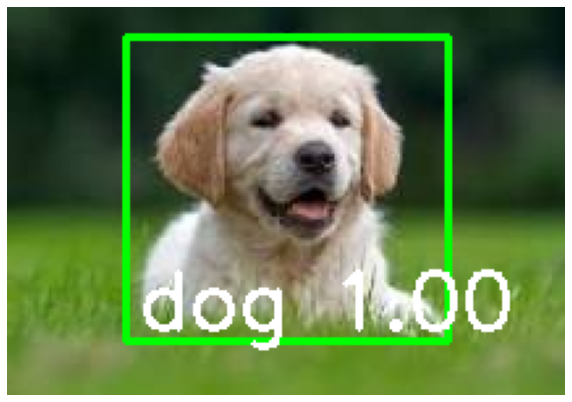

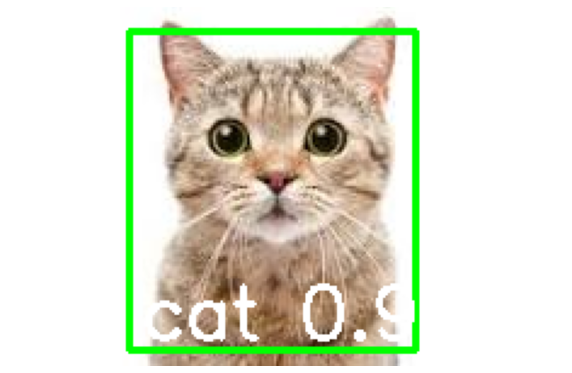

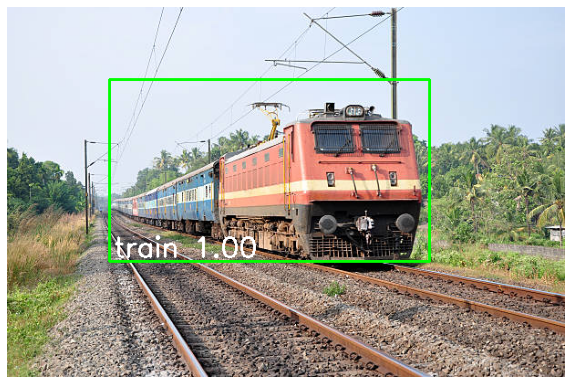

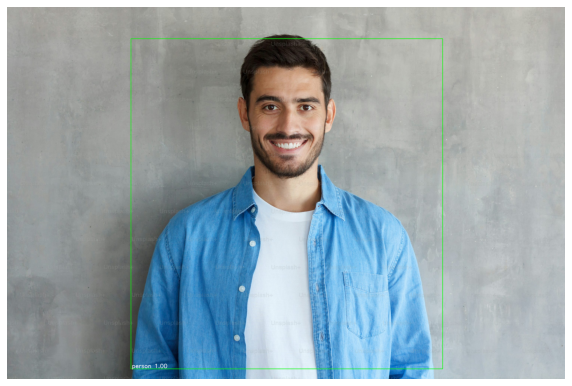

In [21]:
# Example usage:
detect_objects('dog.jpeg')
detect_objects('car.jpeg')
detect_objects('train.jpg')
detect_objects('man.jpeg')
